<a href="https://colab.research.google.com/github/Charmiece/Final-Project---CreditCard-Fraud/blob/Afreensiddiqa/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
# Find the latest version of spark 3.0  from http://www.apache.org/dist/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.0.3'
spark_version = 'spark-3.0.3'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop2.7.tgz
!tar xf $SPARK_VERSION-bin-hadoop2.7.tgz
!pip install -q findspark

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop2.7"

# Start a SparkSession
import findspark
findspark.init()

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:13 https://developer.download.n

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("CloudETL").config("spark.driver.extraClassPath","/content/postgresql-42.2.9.jar").getOrCreate()

In [3]:
from pyspark import SparkFiles
url ="https://fraudcreditcard.s3.amazonaws.com/fraudTrain.csv"
spark.sparkContext.addFile(url)
df = spark.read.csv(SparkFiles.get("fraudTrain.csv"), sep=",", header=True)
# Show DataFrame
df.show()

+---+---------------------+-------------------+--------------------+-------------+------+-----------+---------+------+--------------------+--------------------+-----+-----+-------+------------------+--------+--------------------+----------+--------------------+----------+------------------+------------------+--------+
|_c0|trans_date_trans_time|             cc_num|            merchant|     category|   amt|      first|     last|gender|              street|                city|state|  zip|    lat|              long|city_pop|                 job|       dob|           trans_num| unix_time|         merch_lat|        merch_long|is_fraud|
+---+---------------------+-------------------+--------------------+-------------+------+-----------+---------+------+--------------------+--------------------+-----+-----+-------+------------------+--------+--------------------+----------+--------------------+----------+------------------+------------------+--------+
|  0|  2019-01-01 00:00:18|   2703186189

In [4]:
from pyspark import SparkFiles
url ="https://fraudcreditcard.s3.amazonaws.com/fraudTest.csv"
spark.sparkContext.addFile(url)
df = spark.read.csv(SparkFiles.get("fraudTest.csv"), sep=",", header=True)
# Show DataFrame
df.show()

+---+---------------------+-----------+--------------------+--------------+------+---------+--------+------+--------------------+-------------+-----+-----+-------+---------+--------+--------------------+----------+--------------------+----------+---------+-----------+--------+
|_c0|trans_date_trans_time|     cc_num|            merchant|      category|   amt|    first|    last|gender|              street|         city|state|  zip|    lat|     long|city_pop|                 job|       dob|           trans_num| unix_time|merch_lat| merch_long|is_fraud|
+---+---------------------+-----------+--------------------+--------------+------+---------+--------+------+--------------------+-------------+-----+-----+-------+---------+--------+--------------------+----------+--------------------+----------+---------+-----------+--------+
|  0|      6/21/2020 12:14|2.29116E+15|fraud_Kirlin and ...| personal_care|  2.86|     Jeff| Elliott|     M|   351 Darlene Green|     Columbia|   SC|29209|33.9659| -8

In [5]:
# importing the packages
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import date
import sklearn.exceptions
from pylab import rcParams
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.svm import OneClassSVM
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import IsolationForest
from imblearn.under_sampling import NearMiss 
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, metrics, preprocessing, svm
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report,accuracy_score
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)



from sklearn.ensemble import RandomForestClassifier

In [6]:
# loading data
data_train = pd.read_csv("https://fraudcreditcard.s3.amazonaws.com/fraudTrain.csv")
data_test = pd.read_csv("https://fraudcreditcard.s3.amazonaws.com/fraudTest.csv")

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [8]:
print(data_train.shape,data_test.shape)

(1296675, 23) (555719, 23)


In [9]:
# taking smaller sample to run the model faster

df_train= data_train.sample(frac = 0.1,random_state=1)
df_test= data_test.sample(frac = 0.05,random_state=1)
print(df_train.shape,df_test.shape)
df_train.head(10)

(129668, 23) (27786, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
94102,94102,2019-02-25 08:24:40,374497717543058,fraud_Funk Group,grocery_net,20.00,Linda,Hurst,F,31701 Tucker Square Suite 893,...,47.1709,-100.7944,1190,"Designer, ceramics/pottery",1948-06-30,1595dec12f6f19ceaae9b7df0f8af5c0,1330158280,46.398331,-99.813959,0
198791,198791,2019-04-12 19:50:15,4428154703770710,"fraud_Prosacco, Kreiger and Kovacek",home,284.88,Brittany,Guerra,F,79209 Gary Dale,...,46.5901,-117.1692,761,Chief Marketing Officer,1943-06-30,0ed26b649ed0fce94d8e632b7208dea0,1334260215,45.687331,-117.488135,0
1238587,1238587,2020-05-31 21:50:53,213148039875802,"fraud_Langworth, Boehm and Gulgowski",shopping_net,5.07,Jill,Jacobs,F,034 Kimberly Mountains,...,27.9551,-82.2966,79613,Environmental consultant,1978-11-30,7096316ec1a4b261e8613013827abae7,1370037053,27.254081,-81.974799,0
619078,619078,2019-09-20 17:06:52,2283743876903625,fraud_Conroy-Emard,food_dining,45.38,Shannon,Williams,F,9345 Spencer Junctions Suite 183,...,34.0770,-84.3033,165556,Prison officer,1997-12-27,d02c35d7bda19c3da84b6d01f02da7e8,1348160812,34.551957,-83.374265,0
573850,573850,2019-08-31 23:22:50,4798937978667559470,fraud_Adams-Barrows,health_fitness,27.52,Robert,Williams,M,09419 Lewis Rapids,...,43.6088,-83.9530,67858,Water quality scientist,1995-03-13,dccf059d9fdc15f1fb9d2abb50e7314b,1346455370,43.032957,-83.521294,0
1201872,1201872,2020-05-17 18:21:17,6538891242532018,fraud_Effertz LLC,entertainment,131.75,Jodi,Rodriguez,F,5796 Lee Coves Apt. 286,...,36.0244,-90.9288,7155,"Engineer, control and instrumentation",1977-03-23,4e700b0737fbfe948c3af0af594a964e,1368814877,35.068173,-90.274482,0
61984,61984,2019-02-05 21:47:54,4998109455173950,fraud_Morissette LLC,entertainment,146.69,Mary,Pruitt,F,2819 Luke Greens Suite 563,...,38.9621,-94.5959,545147,Counsellor,1987-11-18,dd7ea05d67a0ff509e3d0fb1fdfe7f38,1328478474,38.229734,-94.197224,0
552029,552029,2019-08-24 11:59:19,60422928733,fraud_Wiegand-Lowe,grocery_net,74.27,Jeffrey,Powers,M,38352 Parrish Road Apt. 652,...,33.6028,-81.9748,46944,Secondary school teacher,1942-04-02,214d540bdca14cdeb5eb347784d44f0c,1345809559,34.230048,-82.674878,0
1079425,1079425,2020-03-24 06:07:24,377264520876399,fraud_Harris Group,food_dining,11.22,Kara,Miles,F,2076 Thomas Roads Suite 970,...,34.3424,-80.5000,4424,Lawyer,1961-07-31,e7370494e1d3171f0ce1a5bdbae071f4,1364105244,33.700800,-80.342778,0
681734,681734,2019-10-18 03:41:04,4070511711385545,fraud_Dach-Nader,misc_net,3.96,Stephanie,Hopkins,F,44089 Carrie Crossing Suite 954,...,28.9814,-98.0156,2435,"Engineer, mining",1967-04-09,e2f08d1f890af7c6f4d3dfb6cc90a18a,1350531664,29.905143,-98.185725,0


In [10]:
df_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

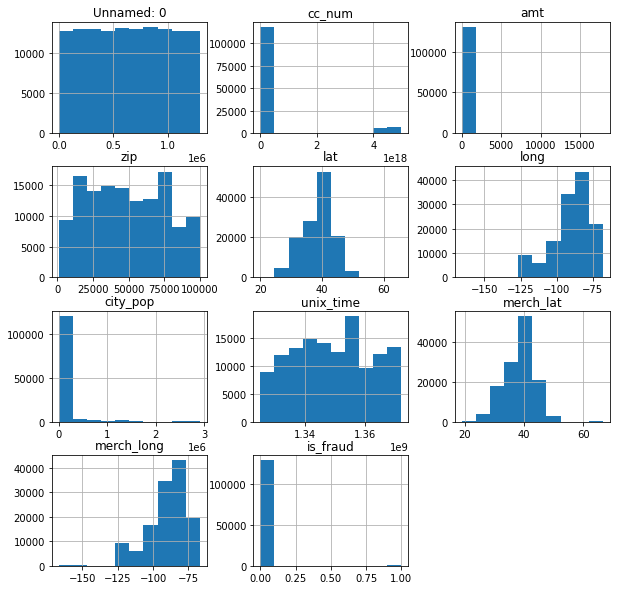

In [11]:
#visual representation of the data using histograms 
df_train.hist(figsize = (10, 10))
plt.show()

Text(0, 0.5, 'Frequency')

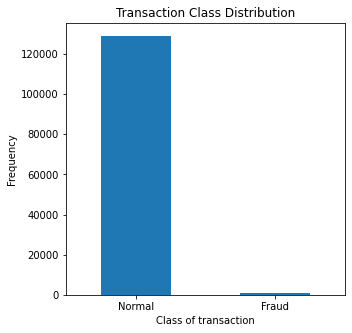

In [12]:
# plotting the classes
plt.figure(figsize=(5,5))
count_classes = pd.value_counts(df_train['is_fraud'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
LABELS = ['Normal','Fraud']
plt.xticks(range(2), LABELS)
plt.xlabel("Class of transaction")
plt.ylabel("Frequency")

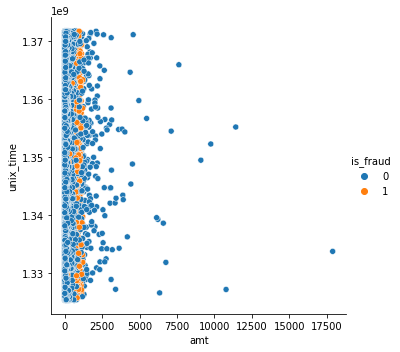

In [13]:
sns.relplot(y = 'unix_time', x = 'amt' , hue = 'is_fraud',data = df_train)

In [14]:
# function to drop tbe columns
def dropCol(data):
    col_to_drop = ['trans_date_trans_time','Unnamed: 0','cc_num','first','last','trans_num']
    res = data.drop(col_to_drop,axis = 1)
    return res

In [15]:
# dropping the columns
# dropping the columns ['trans_date_trans_time','Unnamed: 0','cc_num','first','last','trans_num']
# train data set
df_train = dropCol(df_train)
# test data set
df_test = dropCol(df_test)

print ( df_train.shape, df_test.shape)

(129668, 17) (27786, 17)


In [16]:
#Create independent and Dependent Features
columns = df_train.columns.tolist()

# removing the dependent feature is_fraud
columns = [c for c in columns if c not in ["is_fraud"]]

X_train = df_train[columns]
Y_train = df_train['is_fraud']
X_test = df_test[columns]
Y_test = df_test['is_fraud']
print ( X_train.shape, Y_train.shape,X_test.shape, Y_test.shape)

(129668, 16) (129668,) (27786, 16) (27786,)


In [17]:
# function to convert dob to years
def age_years(born):
    return 2019 - int(born[0:4])

# function to convert dob to years
def age_years(born):
    return 2019 - int(born[0:4])

# replacing the dob column with age column in our data set for test and train
X_train['age'] = X_train['dob'].apply(lambda x: age_years(x))
X_train = X_train.drop(['dob'],axis =1)

X_test['age'] = X_test['dob'].apply(lambda x: age_years(x))
X_test = X_test.drop(['dob'],axis =1)
print(X_train.shape,X_test.shape)



ValueError: ignored